In [1]:
import numpy as np
import pandas as pd
from os import listdir
from os.path import join, isfile

# info tables
src_info = f'/data01/homes/dipiano/E4/irf_random/crab_only/sim/merged_simulator_data.dat'
bkg_info = f'/data01/homes/dipiano/E4/irf_random/crab/sim/merged_simulator_data.dat'

# dataset 
filename = '/data01/homes/dipiano/E4/irf_random/clean_50s_5sgm_5000sz.npy'
ds = np.load(filename, allow_pickle=True, encoding='latin1', fix_imports=True).flat[0]
print(f"Classes: {ds.keys()}\n")
print(f"\nSRC dataset size: {len(ds['SRC'])}")
print(f"BKG dataset size: {len(ds['BKG'])}")

Classes: dict_keys(['SRC', 'BKG'])


SRC dataset size: 5000
BKG dataset size: 5000


In [2]:
from astroai.tools.utils import split_noisy_dataset

train_clean, train_noisy, test_clean, test_noisy = split_noisy_dataset(ds, split=80, reshape=True, binning=250)

print(f"Train clean: {train_clean.shape}")
print(f"Train noisy: {train_noisy.shape}")
print(f"\nTest clean: {test_clean.shape}")
print(f"Test labenoicyls: {test_noisy.shape}")

Train clean: (4000, 250, 250, 1)
Train noisy: (4000, 250, 250, 1)

Test clean: (1000, 250, 250, 1)
Test labenoicyls: (1000, 250, 250, 1)


# !!! CHECK SIMULATE SAME POINTING !!!

In [3]:
crab_only = pd.read_csv(src_info, sep=' ', header=0)
crab_only.head()

,name,seed,start,stop,duration,source_ra,source_dec,point_ra,point_dec,offset,irf,fov,sim_time
0,crab_00001,1,0,600,600,83.6331,22.0145,84.483058,22.795885,1.108162,random,2.5,0.356783
1,crab_00002,2,0,600,600,83.6331,22.0145,85.267299,23.505055,2.119538,random,2.5,0.229658
2,crab_00003,3,0,600,600,83.6331,22.0145,85.517764,23.729140,2.440284,random,2.5,0.316118
3,crab_00004,4,0,600,600,83.6331,22.0145,84.535205,22.843393,1.175743,random,2.5,0.234577
4,crab_00005,5,0,600,600,83.6331,22.0145,84.566758,22.872115,1.216613,random,2.5,0.266131


In [4]:
crab_bkg = pd.read_csv(src_info, sep=' ', header=0)
crab_bkg.head()

,name,seed,start,stop,duration,source_ra,source_dec,point_ra,point_dec,offset,irf,fov,sim_time
0,crab_00001,1,0,600,600,83.6331,22.0145,84.483058,22.795885,1.108162,random,2.5,0.356783
1,crab_00002,2,0,600,600,83.6331,22.0145,85.267299,23.505055,2.119538,random,2.5,0.229658
2,crab_00003,3,0,600,600,83.6331,22.0145,85.517764,23.729140,2.440284,random,2.5,0.316118
3,crab_00004,4,0,600,600,83.6331,22.0145,84.535205,22.843393,1.175743,random,2.5,0.234577
4,crab_00005,5,0,600,600,83.6331,22.0145,84.566758,22.872115,1.216613,random,2.5,0.266131


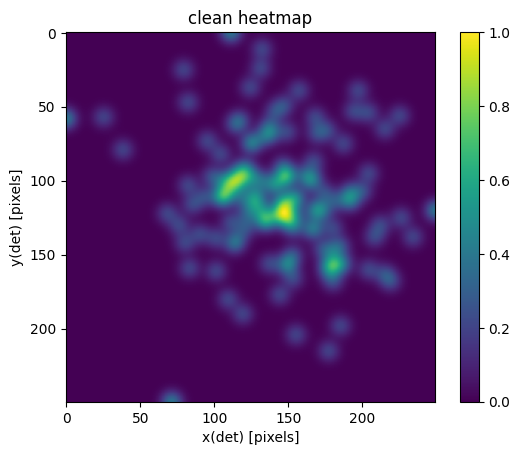

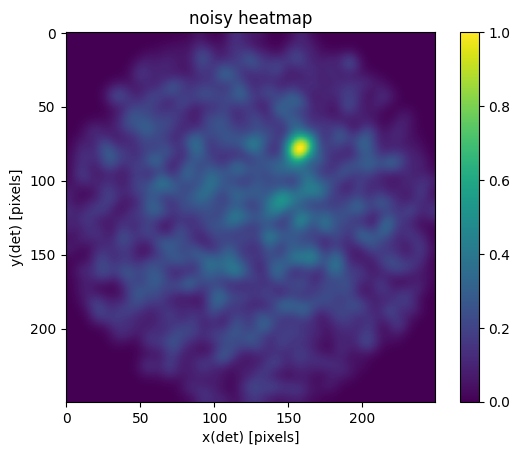

In [10]:
from astroai.tools.utils import plot_heatmap

plot_heatmap(train_clean[6], title=f'clean heatmap', show=True, save=False, save_name=None)
plot_heatmap(train_noisy[0], title=f'noisy heatmap', show=True, save=False, save_name=None)

In [ ]:
import tensorflow as tf
from datetime import datetime
from astroai.models.cnn import create_bkg_cleaner

autoencoder = create_bkg_cleaner(250)
autoencoder.summary()

In [ ]:
from astroai.models.cnn import compile_and_fit_cnn_bkg_cleaner

history = compile_and_fit_cnn_bkg_cleaner(model=model, train_noisy=train_noisy, train_clean=train_clean, 
                                          test_noisy=test_noisy, test_clean=test_clean, 
                                          batch_sz=32, epochs=25, shuffle=True, learning=0.001)

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2)
ax[0].plot(history.history['accuracy'], label='accuracy')
ax[0].plot(history.history['val_accuracy'], label = 'val_accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim([0,1])
ax[0].legend(loc='lower right')

ax[1].plot(history.history['loss'], label='loss')
ax[1].plot(history.history['val_loss'], label = 'val_loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].set_ylim([0,1])
ax[1].legend(loc='lower right')

plt.tight_layout()
plt.show()

test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=2)

In [ ]:
encoded_imgs = encoder.predict(x_test_noisy)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10  # how many plots we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()